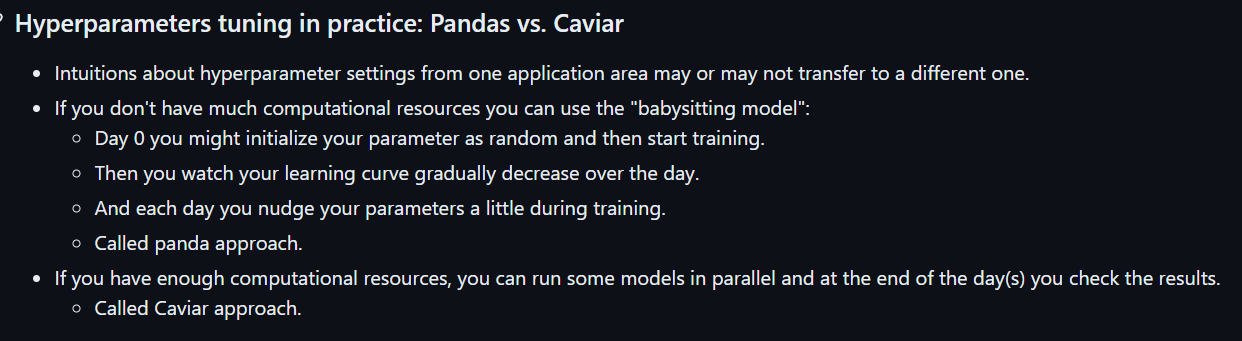

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MLPClassifier
mlp = MLPClassifier(max_iter=1000)

# Define hyperparameter grids
param_grid_grid_search = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (32, 32), (64, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

param_dist_random_search = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (32, 32), (64, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Grid Search
grid_search = GridSearchCV(mlp, param_grid_grid_search, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters (Grid Search):", grid_search.best_params_)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_search.predict(X_test)))

# Random Search
random_search = RandomizedSearchCV(mlp, param_dist_random_search, n_iter=10, cv=3)
random_search.fit(X_train, y_train)
print("Best parameters (Random Search):", random_search.best_params_)
print("Random Search Accuracy:", accuracy_score(y_test, random_search.predict(X_test)))

Best parameters (Grid Search): {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}
Grid Search Accuracy: 1.0
Best parameters (Random Search): {'learning_rate_init': 0.001, 'hidden_layer_sizes': (128,), 'alpha': 0.01, 'activation': 'tanh'}
Random Search Accuracy: 1.0


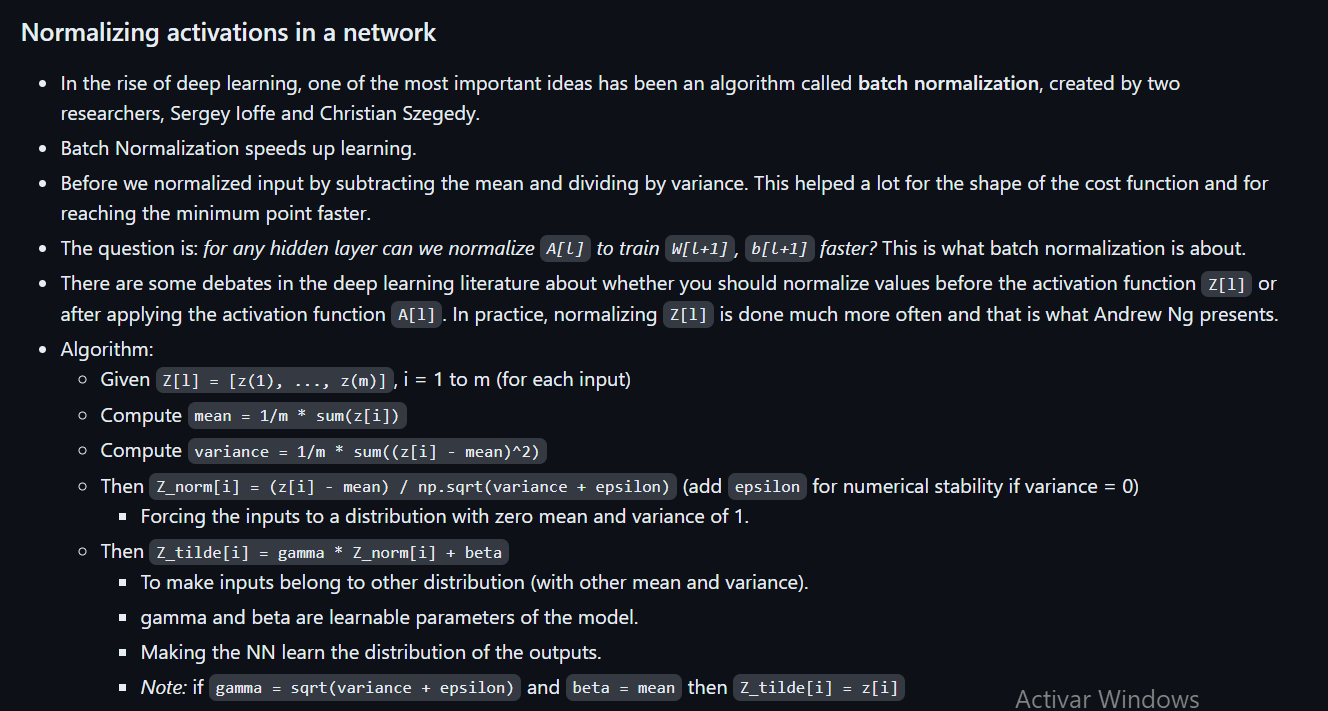

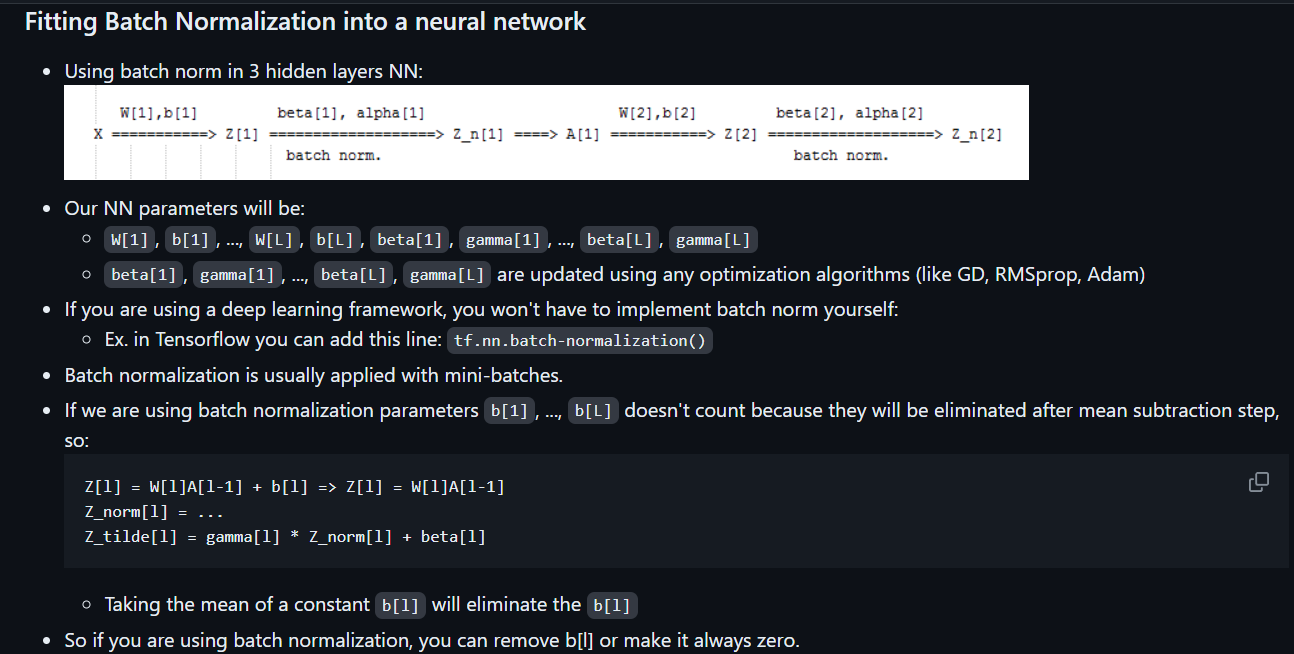

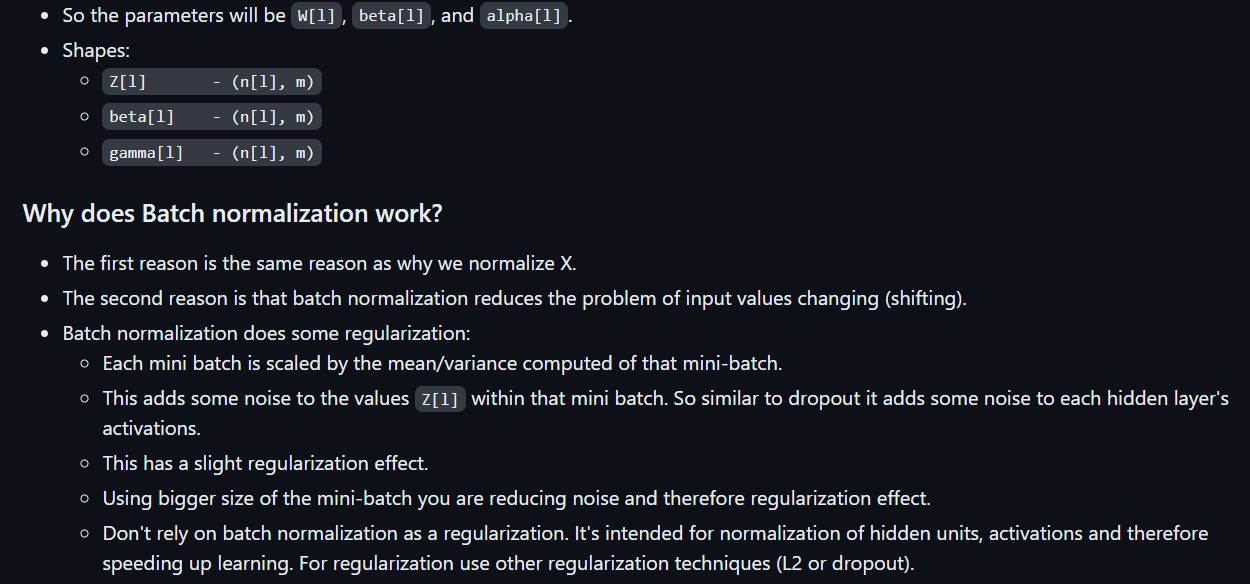

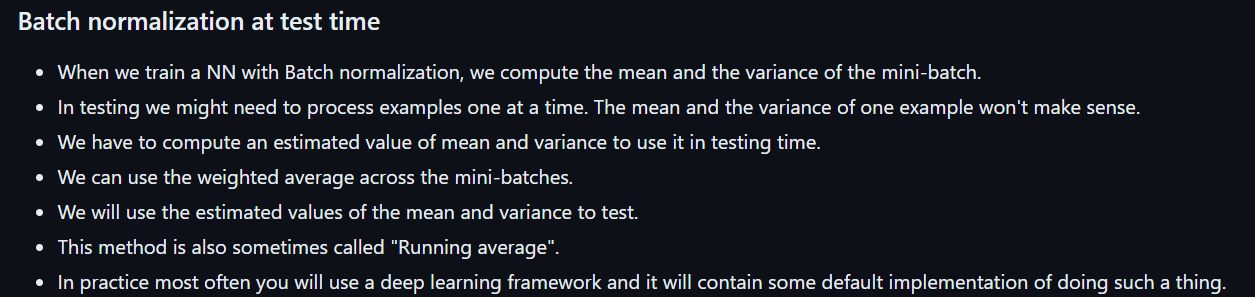

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np

# Load the full MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add a channel dimension (for convolutional layers)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Build the CNN model with batch normalization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/5
1688/1688 [==============================] - 68s 39ms/step - loss: 0.0998 - accuracy: 0.9706 - val_loss: 0.0526 - val_accuracy: 0.9853
Epoch 2/5
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0593 - val_accuracy: 0.9833
Epoch 3/5
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0637 - val_accuracy: 0.9855
Epoch 4/5
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0299 - accuracy: 0.9912
Test accuracy: 0.9911999702453613
